# Syntactic Assignment 
# Peter Muchina
# P52/37461/2020

### This python notebook contains different methods of natual language processing. I have added comments and headings in and before some cells to give full context of what is happening. This notebook rerquires a minimum of python 3.6.

In [1]:
# Import libs that will be used for processing
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import re

### One has to download the stanford libraries. You can download them using this link https://stanfordnlp.github.io/CoreNLP/download.html

In [2]:
# Import stanford parser. This will be used for syntatic parsing
import os
from nltk.parse.corenlp import CoreNLPServer

# Use the path where you have save the downloaded jar files
STANFORD = os.path.join("/Users/peter.muchina/Desktop/School/Year_1/Semester_1/CCI508_Language_Technologies/Standford_libs/",
                        "stanford-corenlp-4.1.0")

# Create the server
server = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.1.0.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.1.0-models.jar"),    
)

# Start the server in the background
server.start()

In [3]:
path = '/Users/peter.muchina/Downloads/TweetRaw.csv'
data = pd.read_csv(path, sep=',')

In [4]:
data.head()

,Date,Tweet
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...


In [5]:
tweets = data['Tweet'].tolist()
len(tweets)

20020

In [6]:
# Get Swahili stop words
url = 'https://github.com/stopwords-iso/stopwords-sw/blob/master/raw/gh-stopwords-json-sw.txt?raw=true'
# Read file and add headers
swa_stop_words_df = pd.read_csv(url, error_bad_lines=False)
swa_stop_words_df.columns = ['SwaStopWords']
swa_stop_words_df.head()
swa_stop_words = swa_stop_words_df['SwaStopWords'].tolist()
swa_stop_words = [word.lower() for word in swa_stop_words]
eng_stop_words = stopwords.words('english')
stop_words = swa_stop_words + eng_stop_words

In [7]:
# Remove punctuations, non_ascii chars, stop_words, html, emoticons
cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
# List to store dicts
cleaned_data_list = []
for tweet in tweets[0:1000]:
    # Tokenize lower tweet
    tokenized = nltk.word_tokenize(tweet)
    # Part of speech tagging
    tagged = nltk.pos_tag(tokenized)
    # Named Entity
    named_entity = nltk.ne_chunk(tagged)
    named_entities = []
    for tagged_tree in named_entity:
       if hasattr(tagged_tree, 'label'):
          entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #
          entity_type = tagged_tree.label() # get NE category
          named_entities.append((entity_name, entity_type))
    # Remove stop words
    no_stop_words = " ".join([word for word in tweet.split() if word.lower() not in stop_words])
    # Remove punctuation
    no_punc_tweet = no_stop_words.translate(str.maketrans('', '', string.punctuation))
    # Remove non-ascii character and replace with space
    no_non_ascii = ''.join([i if ord(i) < 128 else ' ' for i in no_punc_tweet])
    # Remove html
    no_html = re.sub(cleanr, '', no_non_ascii)
    #Remove emoticons
    no_emoji = re.sub(emoji_pattern, '', no_html)
    # Convert to lower
    lower_tweet = no_emoji.lower()
    # append to data frame
    cleaned_data = {
        'original_tweet' : tweet,
        'tokenized': tokenized,
        'tagged': tagged,
        'named_entity': named_entities,
        'no_stop_words' : no_stop_words, 
        'no_punc_tweet' : no_punc_tweet,
        'no_non_ascii': no_non_ascii,
        'no_html': no_html,
        'no_emoji': no_emoji,
        'lower_tweet': lower_tweet
    }
    cleaned_data_list.append(cleaned_data)
# Create empty data frame for comparison
column_names = ["original_tweet","tokenized", "tagged", "named_entity", "no_stop_words", "no_punc_tweet",
                "no_non_ascii", "no_html", "no_emoji", "lower_tweet"]
final_data = pd.DataFrame(cleaned_data_list, columns=column_names)

In [7]:
# Allow pandas to display all columns
pd.set_option('display.max_columns', None)
# Allow pandas to show full content of a cell
pd.set_option('display.max_colwidth', None)
final_data.head()

,original_tweet,tokenized,tagged,named_entity,no_stop_words,no_punc_tweet,no_non_ascii,no_html,no_emoji,lower_tweet
0,@ComedyCentralKE These words can kill a Luhya 'Wacha Ugali ipoe',"[@, ComedyCentralKE, These, words, can, kill, a, Luhya, 'Wacha, Ugali, ipoe, ']","[(@, JJ), (ComedyCentralKE, NNP), (These, DT), (words, NNS), (can, MD), (kill, VB), (a, DT), (Luhya, NNP), ('Wacha, NNP), (Ugali, NNP), (ipoe, NN), (', '')]","[(ComedyCentralKE, ORGANIZATION)]",@ComedyCentralKE words kill Luhya 'Wacha Ugali ipoe',ComedyCentralKE words kill Luhya Wacha Ugali ipoe,ComedyCentralKE words kill Luhya Wacha Ugali ipoe,ComedyCentralKE words kill Luhya Wacha Ugali ipoe,ComedyCentralKE words kill Luhya Wacha Ugali ipoe,comedycentralke words kill luhya wacha ugali ipoe
1,The little luhya that remains in me always Sitokingi kills me,"[The, little, luhya, that, remains, in, me, always, Sitokingi, kills, me]","[(The, DT), (little, JJ), (luhya, NN), (that, WDT), (remains, VBZ), (in, IN), (me, PRP), (always, RB), (Sitokingi, NNP), (kills, NNS), (me, PRP)]",[],little luhya remains always Sitokingi kills,little luhya remains always Sitokingi kills,little luhya remains always Sitokingi kills,little luhya remains always Sitokingi kills,little luhya remains always Sitokingi kills,little luhya remains always sitokingi kills
2,@cheernatwildcat kill it at battle this weekend wildcat!! #luhya,"[@, cheernatwildcat, kill, it, at, battle, this, weekend, wildcat, !, !, #, luhya]","[(@, JJ), (cheernatwildcat, NN), (kill, VB), (it, PRP), (at, IN), (battle, NN), (this, DT), (weekend, NN), (wildcat, NN), (!, .), (!, .), (#, #), (luhya, NN)]",[],@cheernatwildcat kill battle weekend wildcat!! #luhya,cheernatwildcat kill battle weekend wildcat luhya,cheernatwildcat kill battle weekend wildcat luhya,cheernatwildcat kill battle weekend wildcat luhya,cheernatwildcat kill battle weekend wildcat luhya,cheernatwildcat kill battle weekend wildcat luhya
3,@HomeboyzRadio H.B.R luv dat luhya hit luhyas always kill awoooh,"[@, HomeboyzRadio, H.B.R, luv, dat, luhya, hit, luhyas, always, kill, awoooh]","[(@, JJ), (HomeboyzRadio, NNP), (H.B.R, NNP), (luv, VBZ), (dat, JJ), (luhya, NN), (hit, VBD), (luhyas, JJ), (always, RB), (kill, VBP), (awoooh, NNS)]","[(HomeboyzRadio, ORGANIZATION)]",@HomeboyzRadio H.B.R luv dat luhya hit luhyas always kill awoooh,HomeboyzRadio HBR luv dat luhya hit luhyas always kill awoooh,HomeboyzRadio HBR luv dat luhya hit luhyas always kill awoooh,HomeboyzRadio HBR luv dat luhya hit luhyas always kill awoooh,HomeboyzRadio HBR luv dat luhya hit luhyas always kill awoooh,homeboyzradio hbr luv dat luhya hit luhyas always kill awoooh
4,#HangOutFriday hahaha ball ya terby( derby) Luhyas will kill me,"[#, HangOutFriday, hahaha, ball, ya, terby, (, derby, ), Luhyas, will, kill, me]","[(#, #), (HangOutFriday, NNP), (hahaha, VB), (ball, NN), (ya, NN), (terby, NN), ((, (), (derby, JJ), (), )), (Luhyas, NNP), (will, MD), (kill, VB), (me, PRP)]","[(Luhyas, PERSON)]",#HangOutFriday hahaha ball terby( derby) Luhyas kill,HangOutFriday hahaha ball terby derby Luhyas kill,HangOutFriday hahaha ball terby derby Luhyas kill,HangOutFriday hahaha ball terby derby Luhyas kill,HangOutFriday hahaha ball terby derby Luhyas kill,hangoutfriday hahaha ball terby derby luhyas kill


### Computing the parse tree for each column in our dataframe is very expensive. For that reason, I will be drawing a parse tree for a single record at any given time. The user has the ability to parse any record by choosing which column they would like to process from the data frame and also choosing the  index of the record they want to create a tree for. The index start from 0 - 20020. AFter viewing the tree, ensure you run cell 21 so that the server running in the background is stopped.

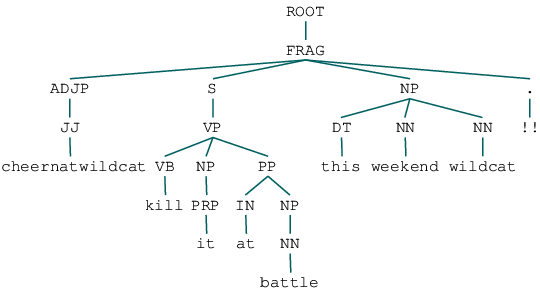

In [20]:
# Import stanford parser from nltk
from nltk.parse import CoreNLPParser
parser = CoreNLPParser()
tweets = final_data['original_tweet'].tolist()

parse = next(parser.parse_text(tweets[2]))
parse

In [21]:
# Stop the CoreNLP server
server.stop()